# **线性回归Python底层实现**

## **实验目标**

通过本案例的学习和课后作业的练习：

1. 了解最优线性回归模型参数的解析解的求解过程；
2. 帮助大家加深线性回归模型的基本求解原理；
3. 掌握通过一个简单的工具包调用过程帮助大家掌握快速实现线性回归模型的方法。

你也可以将本案例相关的 ipynb 学习笔记分享到[ AI Gallery Notebook](https://marketplace.huaweicloud.com/markets/aihub/notebook/list/) 版块获得[成长值](https://marketplace.huaweicloud.com/markets/aihub/article/detail/?content_id=9b8d7e7a-a150-449e-ac17-2dcf76d8b492)，分享方法请查看[此文档](https://marketplace.huaweicloud.com/markets/aihub/article/detail/?content_id=8afec58a-b797-4bf9-acca-76ed512a3acb)。

## **案例内容介绍**

线性回归是机器学习中最基本的模型，用来拟合自变量和因变量之间呈现线性关系的数据，当自变量只有一个时我们称使用的回归模型是一元线性回归模型，当自变量有多个时称使用的回归模型是多元线性回归模型。根据已知数据，求解线性回归模型的参数最常用到的方法是最小二乘法，求解使得损失函数取得最小值的模型参数的解析解或者使用梯度下降算法求得最优的模型参数。

本案例推荐的理论学习视频：

- [《AI技术领域课程--机器学习》 线性回归 ](https://education.huaweicloud.com/courses/course-v1:HuaweiX+CBUCNXE086+Self-paced/courseware/ab6a6a573d494a06997714b95aa9069d/de35c1b844f64c91a077087e7a7d6f46/)  

## **注意事项**

1. 如果您是第一次使用 JupyterLab，请查看[《ModelArts JupyterLab使用指导》](https://marketplace.huaweicloud.com/markets/aihub/article/detail/?content_id=03676d0a-0630-4a3f-b62c-07fba43d2857)了解使用方法；

2. 如果您在使用 JupyterLab 过程中碰到报错，请参考[《ModelArts JupyterLab常见问题解决办法》](https://marketplace.huaweicloud.com/markets/aihub/article/detail/?content_id=9ad8ce7d-06f7-4394-80ef-4dbf6cfb4be1)尝试解决问题。

## **实验步骤**

**数据集说明：**   本实验使用的是构造的数据集，数据构造的过程在代码中有明确显示。

### 1、一元线性回归Python底层实现

5.714285714285714 1.4285714285714306


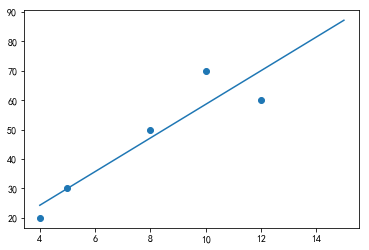

In [1]:
# 一元线性回归的实现

# 导入matplotlib库，主要用于可视化
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

# 引入本地字体文件，否则中文会有乱码
# font_set = FontProperties(fname=r"./work/ simsun.ttc", size=12)

# 构造用于训练的数据集
x_train = [4, 8, 5, 10, 12]
y_train = [20, 50, 30, 70, 60]


# 画图函数


def draw(x_train, y_train):
    plt.scatter(x_train, y_train)


# 定义函数求得斜率w和截距b
# 使用最小二乘法对斜率和截距求导并使得导数值等于0求解出斜率和截距


def fit(x_train, y_train):
    size = len(x_train)
    numerator = 0  # 初始化分子
    denominator = 0  # 初始化分母
    for i in range(size):
        numerator += (x_train[i] - np.mean(x_train)) * \
                     (y_train[i] - np.mean(y_train))
        denominator += (x_train[i] - np.mean(x_train)) ** 2
    w = numerator / denominator
    b = np.mean(y_train) - w * np.mean(x_train)
    return w, b


# 根据斜率w和截距b，输入x计算输出值


def predict(x, w, b):
    # 预测模型
    y = w * x + b
    return y


# 根据W,B画图


def fit_line(w, b):
    # 测试集进行测试，并作图
    # linspace 创建等差数列的函数    #numpy.limspace(start,stop,num,endpoint=True,retstep=False,dtype=None,axis=0#)
    x = np.linspace(4, 15, 9)
    y = w * x + b
    plt.plot(x, y)
    plt.show()


if __name__ == "__main__":
    draw(x_train, y_train)
    w, b = fit(x_train, y_train)
    print(w, b)  # 输出斜率和截距
fit_line(w, b)  # 绘制预测函数图像

### 2、多元线性回归的实现

In [2]:
# 多元线性回归的实现
# 导入模块
import numpy as np
import pandas as pd

# 构造数据，前三列表示自变量X，最后一列表示因变量Y
data = np.array([[3, 2, 9, 20],
                 [4, 10, 2, 72],
                 [3, 4, 9, 21],
                 [12, 3, 4, 20]])
print("data:", data, "\n")

X = data[:, :-1]
Y = data[:, -1]

X = np.mat(np.c_[np.ones(X.shape[0]), X])  # 为系数矩阵增加常数项系数
Y = np.mat(Y)  # 数组转化为矩阵

print("X:", X, "\n")
print("Y:", Y, "\n")

# 根据最小二乘法的目标函数求导为0得到最优参数向量B的解析解公式如下，可以直接求取最优参数向量
B = np.linalg.inv(X.T * X) * (X.T) * (Y.T)
print("B:", B, "\n")  # 输出系数,第一项为常数项，其他为回归系数
print("1,60,60,60预测结果：", np.mat([1, 60, 60, 60]) * B, "\n")  # 预测结果

# 相关系数
Q_e = 0
Q_E = 0
Y_mean = np.mean(Y)
for i in range(Y.size):
    Q_e += pow(np.array((Y.T)[i] - X[i] * B), 2)
    Q_E += pow(np.array(X[i] * B) - Y_mean, 2)
R2 = Q_E / (Q_e + Q_E)
print("R2", R2)

data: [[ 3  2  9 20]

 [ 4 10  2 72]

 [ 3  4  9 21]

 [12  3  4 20]] 



X: [[ 1.  3.  2.  9.]

 [ 1.  4. 10.  2.]

 [ 1.  3.  4.  9.]

 [ 1. 12.  3.  4.]] 



Y: [[20 72 21 20]] 



B: [[98.70689655]

 [-4.19827586]

 [ 0.5       ]

 [-7.45689655]] 



1,60,60,60预测结果： [[-570.60344828]] 



R2 [[1.]]


### 3、线性回归第三方库实现

In [2]:
# 导入sklearn下的LinearRegression 方法
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()

# 构造用于训练的数据集
x_train = np.array([[2, 4], [5, 8], [5, 9], [7, 10], [9, 12]])
y_train = np.array([20, 50, 30, 70, 60])

# 训练模型并输出模型系数和训练结果
model.fit(x_train, y_train)
# fit(x,y,sample_weight=None)x:训练集 y:目标值 sample_weight:每个样本的个数
# coef_ 系数w,intercept_截距
print(model.coef_)  # 输出系数w
print(model.intercept_)  # 输出截距b
print(model.score(x_train, y_train))  # 输出模型的评估分数R2

[13.39207048 -6.03524229]
22.907488986784166
0.7433664583546766


以上是 线性回归 的实现方法，受限于篇幅原因，本案例未完全覆盖 线性回归 的全部操作，欢迎你将更全面的 线性回归 学习笔记分享到[ AI Gallery Notebook](https://marketplace.huaweicloud.com/markets/aihub/notebook/list/) 版块获得[成长值](https://marketplace.huaweicloud.com/markets/aihub/article/detail/?content_id=9b8d7e7a-a150-449e-ac17-2dcf76d8b492)，分享方法请查看[此文档](https://marketplace.huaweicloud.com/markets/aihub/article/detail/?content_id=8afec58a-b797-4bf9-acca-76ed512a3acb)。

## **作业**

请你利用本实验中学到的知识点，完成以下编程题：

1. [请你尝试修改 LogisticRegression() 函数的 penalty（正则化选择）参数的不同取值，看看该参数的修改对模型会有怎样的影响。](https://marketplace.huaweicloud.com/markets/aihub/notebook/detail/?id=9de6965a-1e50-4e95-bcdd-bb59057cef11)
2. [请你尝试修改 LogisticRegression() 函数的 solver（优化算法选择）参数的不同取值，看看该参数的修改对模型会有怎样的影响。](https://marketplace.huaweicloud.com/markets/aihub/notebook/detail/?id=c1267237-10cd-44b9-a315-b692510ecabb)
3. [根据乳腺癌数据集，基于Sklearn实现一个逻辑回归模型预测病人是否得了癌症。](https://marketplace.huaweicloud.com/markets/aihub/notebook/detail/?id=d3e592ad-99fd-43ee-8f14-5279a9f50243)